# Docker Set-up

In [4]:
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline

Create Database "project_final"

In [5]:
try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "postgres")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute('CREATE DATABASE project_final;')
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

Create Table

In [6]:
table_create_string = """
CREATE TABLE project_data(
  Year integer,
  Month integer,
  Supplier varchar(255),
  Item_Code integer,
  Item_Description varchar(255),
  Item_Type varchar(255),
  Retail_Sales numeric(8,1),
  Retail_Transfers integer,
  Warehouse_Sales numeric(10,1)
);
"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "project_final"
    )
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(table_create_string)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

Import warehouse_sales.csv to database

In [7]:
import csv

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "project_final"
    )
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    insertString = "INSERT INTO project_data VALUES ({},"+"{},"+"'{}',"+"{},"+"'{}',"+"'{}',"+"{},"+"{})"
    with open('C:/Users/dylan/OneDrive/Desktop/DAP/warehouse_sales.csv', 'r') as f:
        reader = csv.reader(f)
        next(reader) # skip the header
        for row in reader:
            dbCursor.execute(insertString.format(*row))
    dbConnection.commit()
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

# Analysis

Total Sales and Transfers for Warehouse

In [30]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

In [31]:
sql = """
SELECT
    SUM(Retail_Sales) AS retail_sales,
    SUM(Retail_Transfers) AS retail_transfers
FROM
    project_data
"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "project_final"
    )
    project_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [32]:
project_dataframe

,retail_sales,retail_transfers
0,50204.4,51759


Total Sales and Transfers by Product

In [10]:
sql = """
SELECT
    Item_Type as item_type,
    SUM(Retail_Sales) AS retail_sales,
    SUM(Retail_Transfers) AS retail_transfers
FROM
    project_data
GROUP BY
    item_type
"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "project_final"
    )
    project_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [11]:
project_dataframe

,item_type,retail_sales,retail_transfers
0,KEGS,0.0,0
1,WINE,11336.0,11746
2,NON-ALCOHOL,963.5,525
3,DUNNAGE,0.0,0
4,STR_SUPPLIES,153.4,140
5,BEER,10972.0,12520
6,REF,16.0,25
7,LIQUOR,26763.5,26803


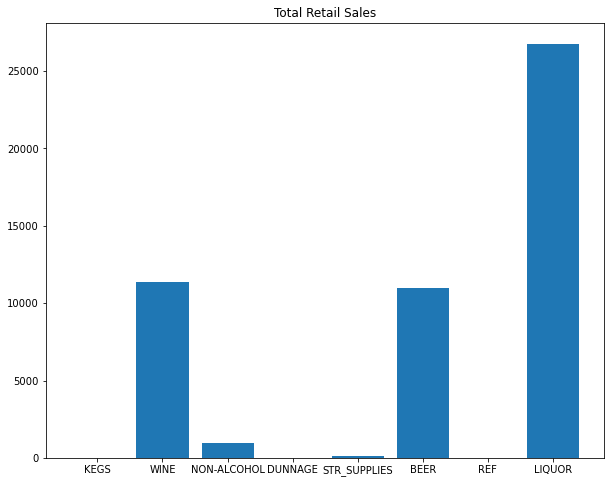

In [14]:
plt.figure(figsize=(10,8))
plt.bar('item_type', 'retail_sales', data=project_dataframe)
plt.title("Total Retail Sales")
plt.savefig('C:/Users/dylan/OneDrive/Desktop/DAP/totalsales.png')

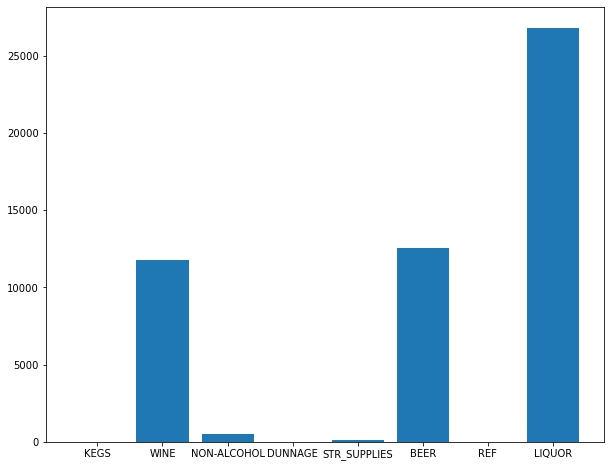

In [15]:
plt.figure(figsize=(10,8))
plt.bar('item_type', 'retail_transfers', data=project_dataframe)
plt.savefig('C:/Users/dylan/OneDrive/Desktop/DAP/totaltransfers.png')

Average Sales and Transfers by Product

In [16]:
sql = """
SELECT
    Item_Type AS item_type,
    AVG(Retail_Sales) AS avg_retail_sales,
    AVG(Retail_Transfers) AS avg_retail_transfers
FROM
    project_data
GROUP BY
    item_type
"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "project_final"
    )
    project_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [17]:
project_dataframe

,item_type,avg_retail_sales,avg_retail_transfers
0,KEGS,0.000000,0.000000
1,WINE,1.865701,1.933180
2,NON-ALCOHOL,18.528846,10.096154
3,DUNNAGE,0.000000,0.000000
4,STR_SUPPLIES,8.522222,7.777778
5,BEER,8.243426,9.406461
6,REF,8.000000,12.500000
7,LIQUOR,12.356187,12.374423


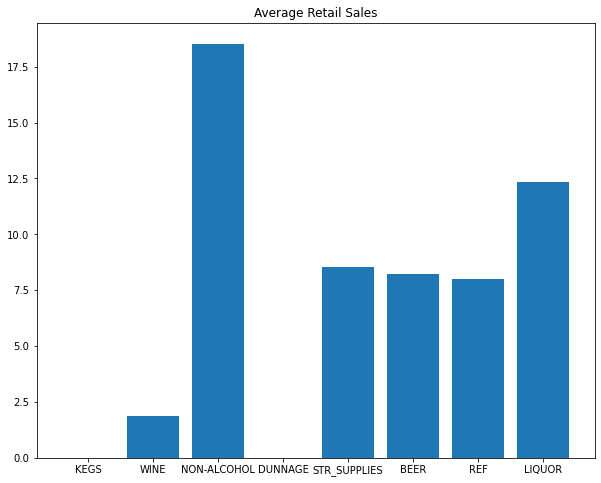

In [18]:
plt.figure(figsize=(10, 8))
plt.bar("item_type",'avg_retail_sales', data=project_dataframe)
plt.title("Average Retail Sales")
plt.savefig('C:/Users/dylan/OneDrive/Desktop/DAP/avgsales.png')

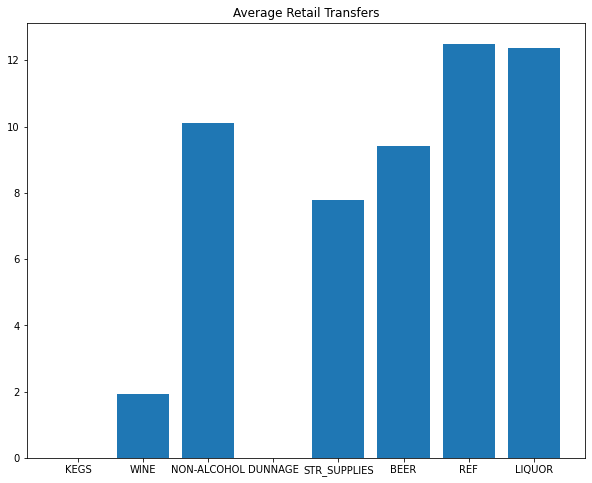

In [19]:
plt.figure(figsize=(10, 8))
plt.bar("item_type",'avg_retail_transfers', data=project_dataframe)
plt.title("Average Retail Transfers")
plt.savefig('C:/Users/dylan/OneDrive/Desktop/DAP/avgtransfers.png')

Most Popular Item Type

In [27]:
sql = """
SELECT
    Item_Type as item,
    COUNT(*) Item_Type
FROM
    project_data
GROUP BY
    item
"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5432",
        database = "project_final"
    )
    project_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

In [28]:
project_dataframe

,item,item_type
0,KEGS,351
1,WINE,6076
2,NON-ALCOHOL,52
3,DUNNAGE,4
4,STR_SUPPLIES,18
5,BEER,1331
6,REF,2
7,LIQUOR,2166


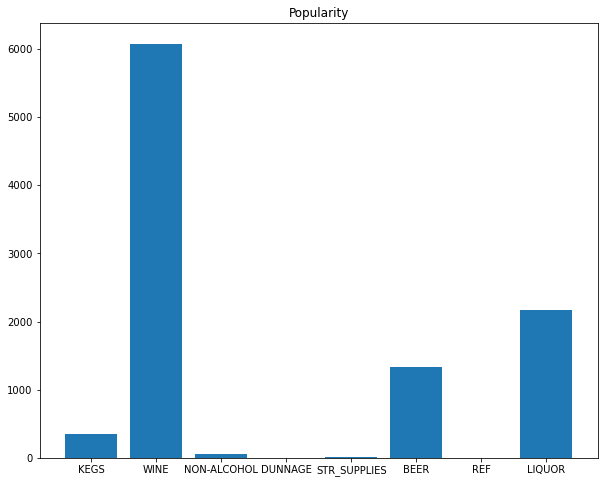

In [29]:
plt.figure(figsize=(10, 8))
plt.bar("item",'item_type', data=project_dataframe)
plt.title("Popularity")
plt.savefig('C:/Users/dylan/OneDrive/Desktop/DAP/popularity.png')